<h1 style="color:blue">Cancer Diagnosis Prediction - EDA</h1>

# Dataset


<a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">Breast Cancer Wisconsin (Diagnostic)</a>


<a href="https://github.com/uci-ml-repo/ucimlrepo/tree/main">github: ucimlrepo package</a>



Citation: Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

**Additional Variable Information**
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

# 1. Import

In [1]:
# Reload modules
%load_ext autoreload
%autoreload 2 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Stastic
import scipy.stats as st

# dotenv import
from dotenv import load_dotenv
import os
from tqdm.auto import tqdm

# Datasets
from ucimlrepo import fetch_ucirepo, list_available_datasets # Libraries for Breast Camcer dataset 


# Import Module
from utils.functions import * # Import Functions

# 2. Breast Cancer Dataset - Load Data

In [3]:
df_clean = pd.read_csv('../data/cleaned/df_clean.csv')

In [4]:
df_clean.drop(columns=['ID'], inplace=True)

In [5]:
df_clean.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 3. Breast Cancer Dataset - EDA

## 3.1 Distribution of Target Variable

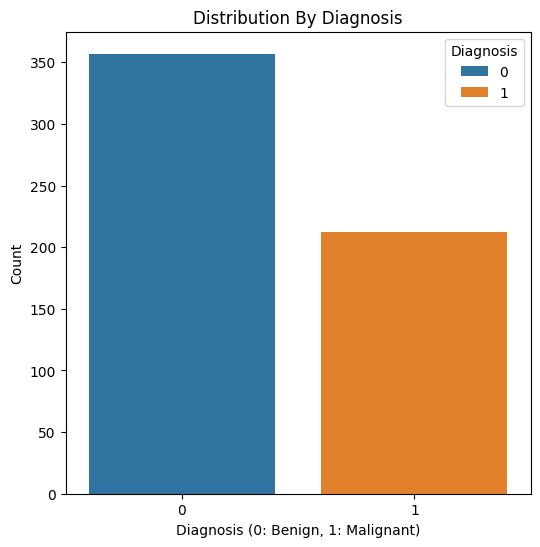

In [6]:
# Distribution By Diagnosis
plt.figure(figsize=(6,6))

sns.countplot(data=df_clean, x='Diagnosis', hue='Diagnosis')
plt.title('Distribution By Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')

plt.savefig("../resources/class_imbalance.png")

plt.show()

## 3.2 Relationship between features and target

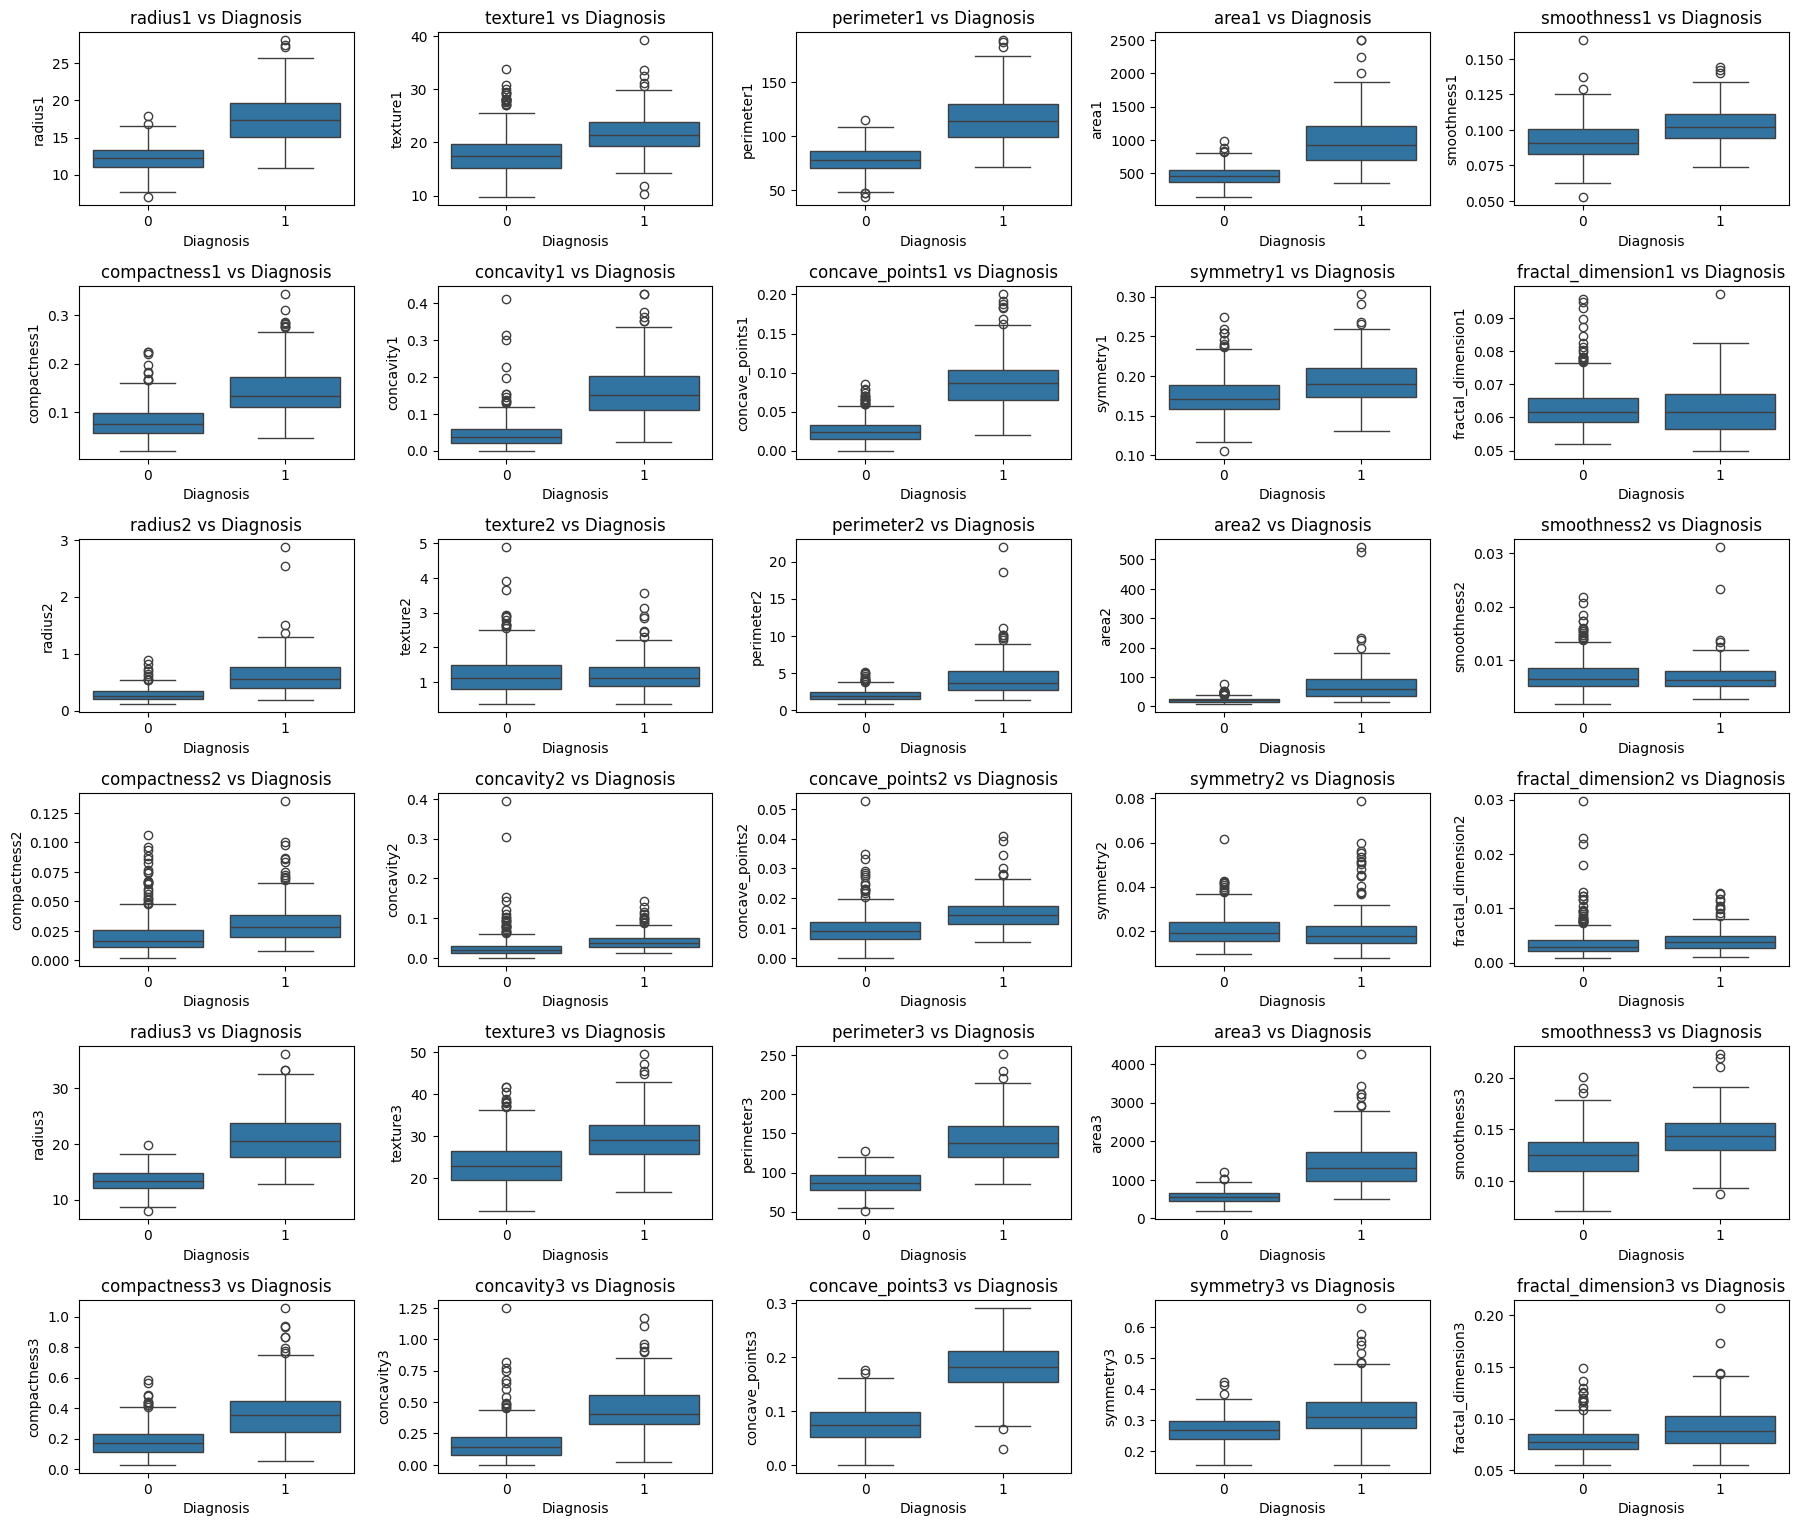

In [13]:
# Box plots
plt.figure(figsize=(18,20))

for i, feature in enumerate(df_clean.drop(columns=['Diagnosis']), start=1):
    #print(feature)
    plt.subplot(8,5,i)
    sns.boxplot(data=df_clean, x='Diagnosis', y=feature)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()

plt.savefig("../resources/boxplot.png")

plt.show()
    

**Univariate Analysis - Feature-Target**

In [8]:
help(univariate_feat_selection)

Help on function univariate_feat_selection in module utils.functions:

univariate_feat_selection(df: pandas.core.frame.DataFrame, alpha: int = 0.05)
    The function calculates the class mean for each feature and validates if the difference is significant or not. 
    Features for which the difference is not significant will be stored in a list.
    The list will be returned.
    Required:
        Dataframe with target column called "Diagnosis"
    Optional:
        value for alpha



In [9]:
univar_drop_cols = univariate_feat_selection(df_clean)

The feature >>fractal_dimension1<< does NOT show a significant difference between the class means (p-value: 0.7667)
The feature >>texture2<< does NOT show a significant difference between the class means (p-value: 0.8354)
The feature >>smoothness2<< does NOT show a significant difference between the class means (p-value: 0.1053)
The feature >>symmetry2<< does NOT show a significant difference between the class means (p-value: 0.8871)


**Correlation**

In [10]:
# Correlation Matrix
corr_matrix = df_clean.corr()

In [11]:
corr_matrix.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560


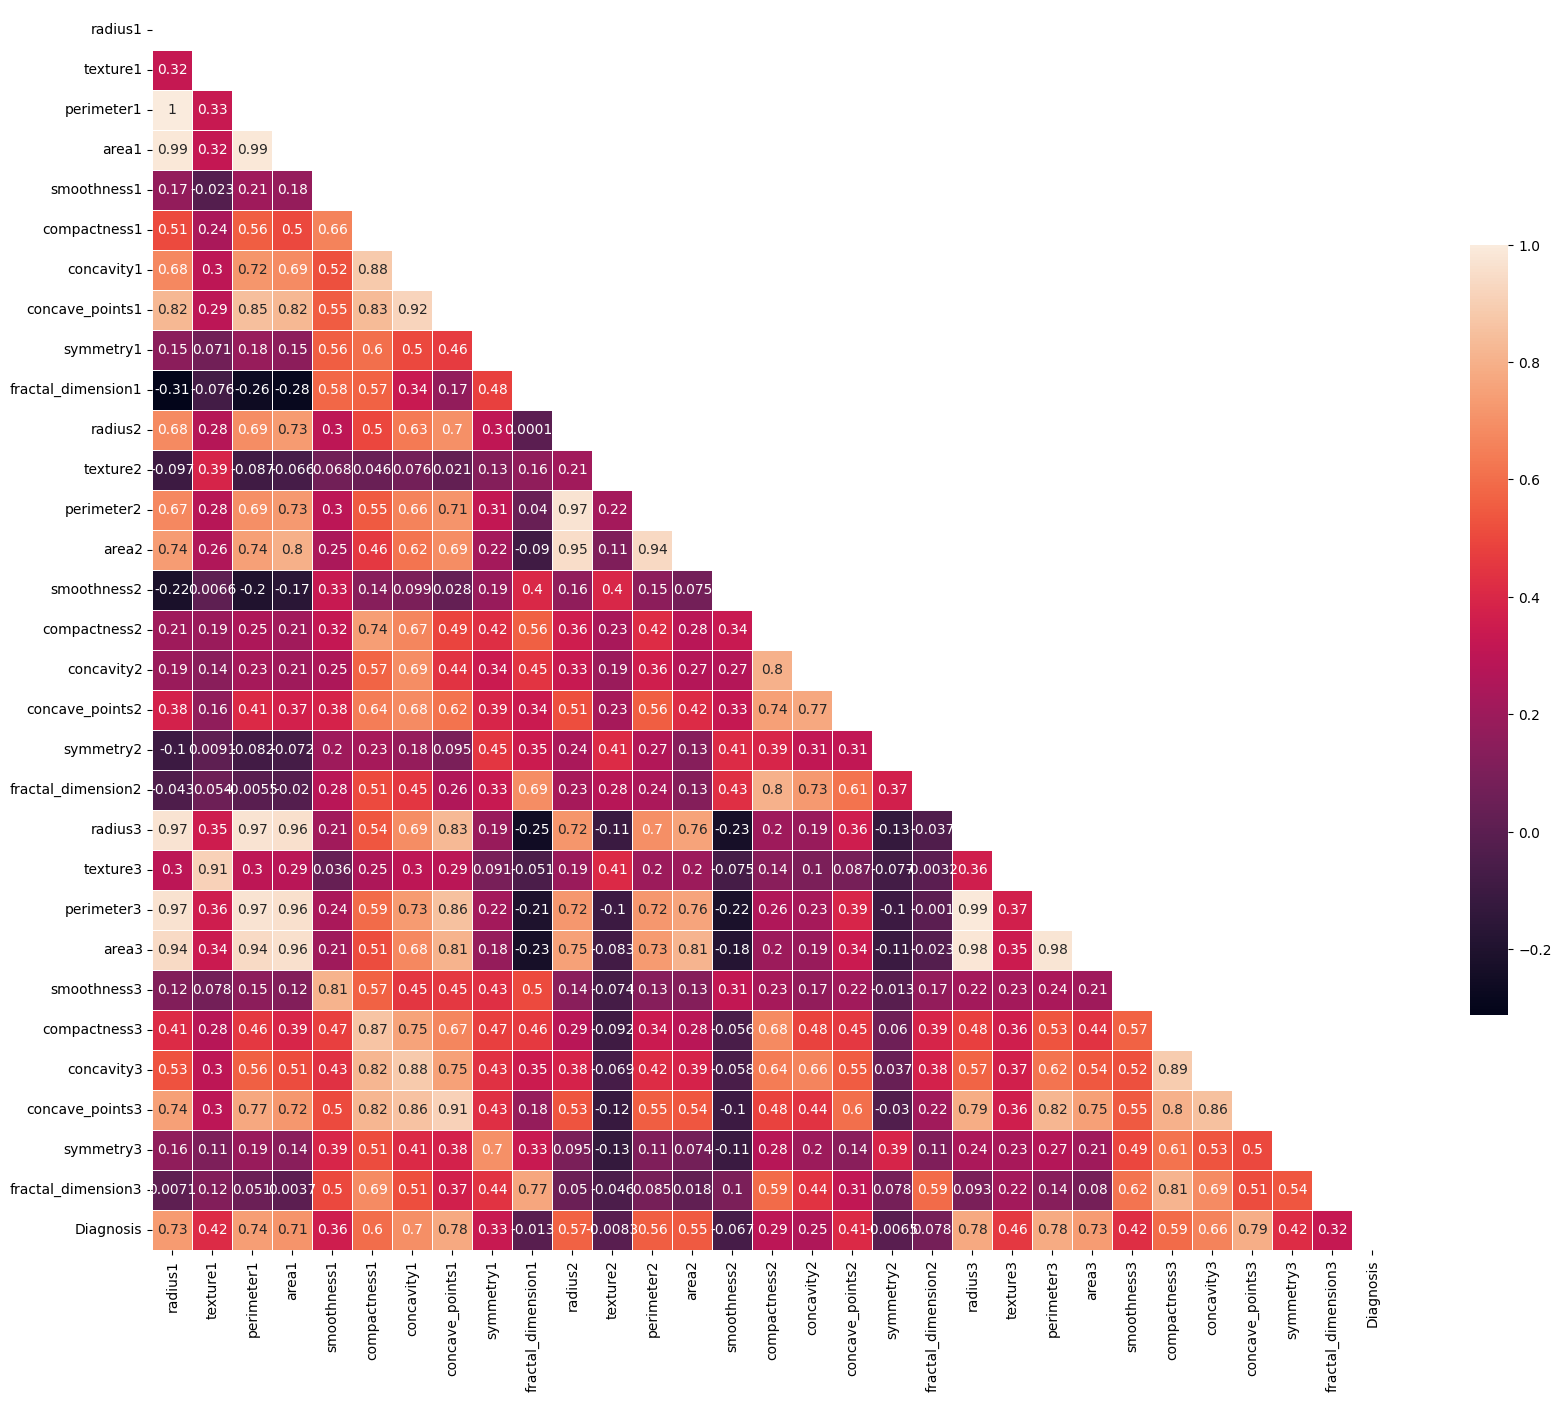

In [12]:
# Heatmap 1

#Set up mask for triangle representation
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr_matrix)

plt.show()

<h1 style="color:green">Summary & Conclusion - EDA</h1>

<b style="color:#00008b">Class imbalance:</b> Distribution of Target Variable<br>
    - there are more datapoints for begning tumors in the dataset compared to malignant tumors<br>
    - In the subsequent chapters where the splitting of the train test will take place a combination of over- and undersampling will be performed to handle class imbalance<br>
<br>
<b style="color:#00008b">Feature-Target Relationship:</b>:<br>
    - for most features there is an "upwards trend" for malignant tumors compared to bening tumors (e.g. malignant tumors have a greater radius and are more compact)<br>
<br>
<b style="color:#00008b">Correlation:</b><br>
    - there are several features highly correlated to each other, which is not surprising as these are all geometrical features describing the phyiscal state of the tumor tissue.<br>
 
<b style="color:#2f4f4f">Initially identified class imbalance of the target column Diagnosis was confirmed (benign > malignant). According to the visual analysis (boxplot) most of the features are eligible for target validation. Some Features my be considered to be removed from the dataset. Several Features show redundancy in terms of correlation with each other and should be considered to be dropped during Feature selection along with Features that have a low correlation to the target. </b>